In [5]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('C:\\Users\\Admin\\Desktop\\New folder\\Project3\\atmparts_sales.csv')
df.head(10)

,Invoice ID,Branch,Region,Customer type,Gender,Parts,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Dallas,Southwest,Member,Female,Screen/Display,74.69,7,26.1415,548.9715,1/5/2019,13:08,Check,522.83,4.761905,26.1415,9.1
1,226-31-3081,Dallas,East,New,Female,CPU,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Dallas,Southwest,New,Male,Power Supply,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Dallas,Southwest,Member,Male,Screen/Display,58.22,8,23.2880,489.0480,1/27/2019,20:33,Check,465.76,4.761905,23.2880,8.4
4,373-73-7910,Dallas,Southwest,New,Male,Cash Dispenser,86.31,7,30.2085,634.3785,2/8/2019,10:37,Check,604.17,4.761905,30.2085,5.3
5,699-14-3026,Dallas,East,New,Male,CPU,85.39,7,29.8865,627.6165,3/25/2019,18:30,Check,597.73,4.761905,29.8865,4.1
6,355-53-5943,Dallas,Southwest,Member,Female,CPU,68.84,6,20.6520,433.6920,2/25/2019,14:36,Check,413.04,4.761905,20.6520,5.8
7,315-22-5665,Dallas,East,New,Female,Power Supply,73.56,10,36.7800,772.3800,2/24/2019,11:38,Check,735.60,4.761905,36.7800,8.0
8,665-32-9167,Dallas,Southwest,Member,Female,Screen/Display,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,Houston,South,Member,Female,Keypad,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
# 1. Understand the Dataset
print("Dataset Overview:")
print(df.info())  # Column types and non-null counts
print("\nSummary Statistics:")
print(df.describe())  # Summary statistics for numerical columns
print("\nFirst 10 Rows:")
print(df.head(10))  # Preview the first 10 rows

# 2. Remove Duplicates
print("\nChecking for Duplicates...")
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
df = df.drop_duplicates()
print("Duplicates removed.")

# 3. Handle Missing Values
print("\nChecking for Missing Values...")
missing_values = df.isnull().sum()
print("Missing Values Per Column:\n", missing_values)

# Strategy for handling missing values:
# Fill numerical columns with the median and categorical columns with the mode
for column in df.columns:
    if df[column].dtype == np.number:  # If numerical
        df[column].fillna(df[column].median(), inplace=True)
    else:  # If categorical
        df[column].fillna(df[column].mode()[0], inplace=True)
print("Missing values handled.")

# 4. Fix Structural Errors
# Example: Fix inconsistent category naming, such as 'USA' vs 'United States'
print("\nFixing Structural Errors...")
df['Region'] = df['Region'].replace({'USA': 'United States', 'us': 'United States'})

# Standardize column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
print("Structural errors fixed.")

# 5. Correct Data Types
# Example: Convert date column to datetime, numerical columns to appropriate types
print("\nCorrecting Data Types...")
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')  # Convert to numeric
print("Data types corrected.")

# 6. Normalize and Scale Data
from sklearn.preprocessing import MinMaxScaler

print("\nNormalizing and Scaling Data...")
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Identify numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("Data normalized and scaled.")

# Final Check
print("\nCleaned Dataset Overview:")
print(df.info())
print("\nFirst 10 Rows of Cleaned Data:")
print(df.head(10))

In [15]:
# Convert any date columns to datetime 
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    print("\nDate column converted to datetime format.")


Date column converted to datetime format.


In [11]:
# Check for missing values in each column
print("Missing values per column:\n", df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

Missing values per column:
 Invoice ID                 0
Branch                     0
Region                     0
Customer type              0
Gender                     0
Parts                      0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Number of duplicate rows: 0


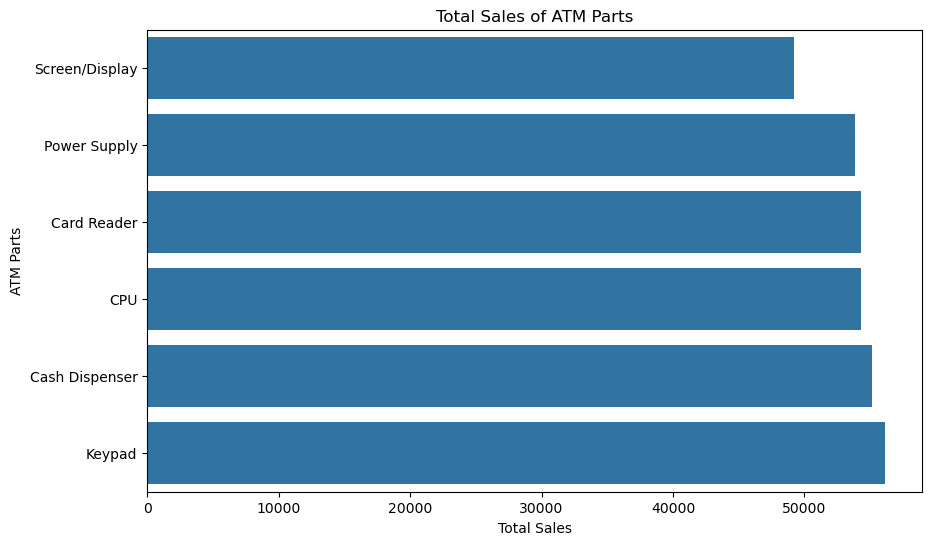

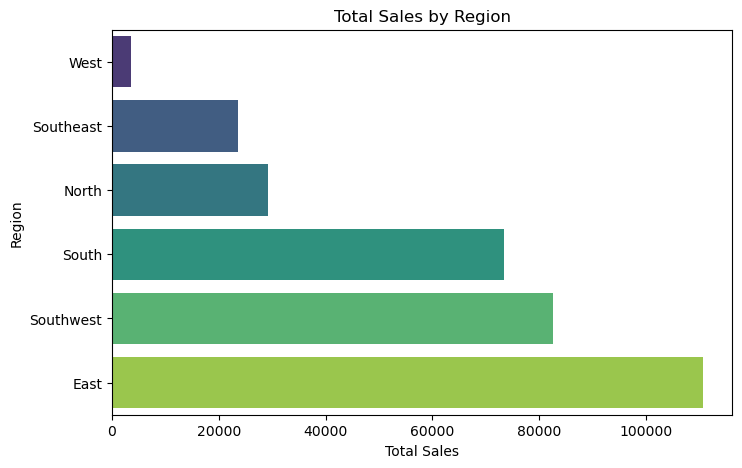

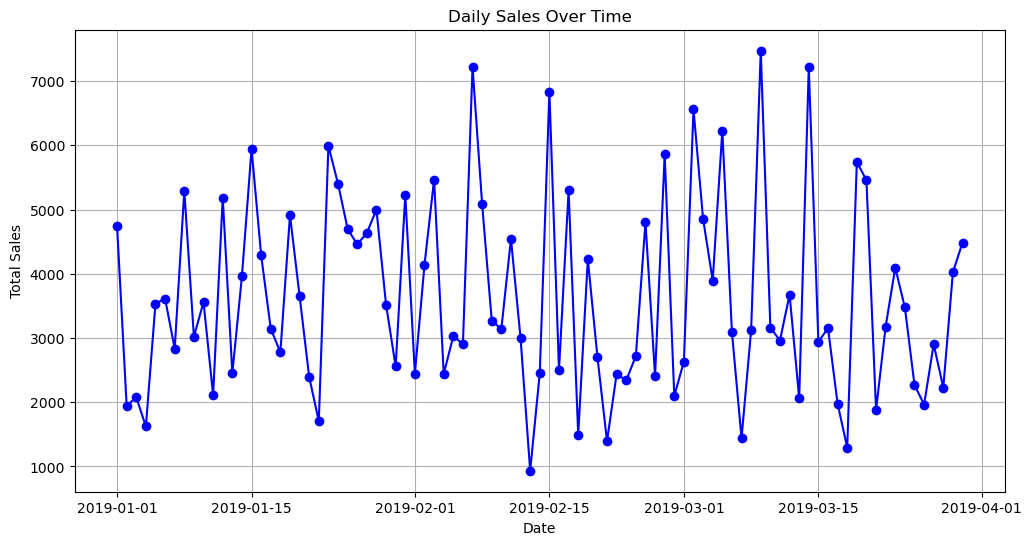

In [37]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Total Sales by Part
parts_sales = df.groupby('Parts')['Total'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=parts_sales, y=parts_sales.index)
plt.title('Total Sales of ATM Parts')
plt.xlabel('Total Sales')
plt.ylabel('ATM Parts')
plt.show()

# Total Sales by Region
region_sales = df.groupby('Region')['Total'].sum().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales, y=region_sales.index, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

# Sales Over Time
if 'Date' in df.columns:
    daily_sales = df.groupby('Date')['Total'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales.index, daily_sales.values, marker='o', color='b')
    plt.title('Daily Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()

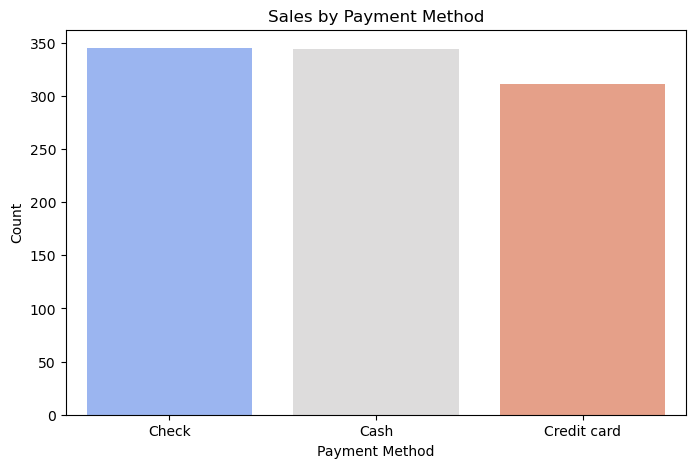

In [41]:
# Sales by Payment Method
payment_sales = df['Payment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='coolwarm')
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

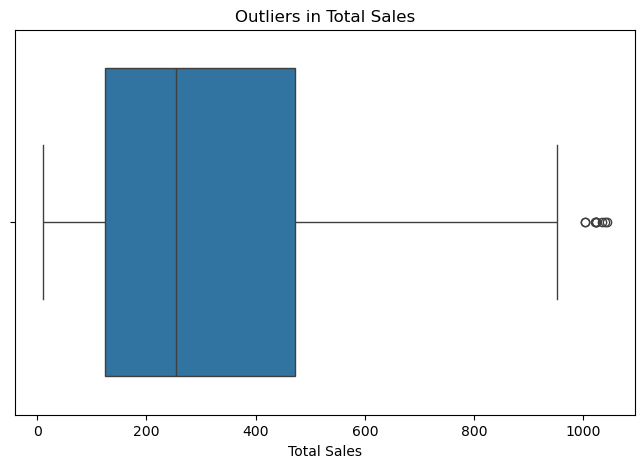

In [45]:
# Boxplot to Detect Outliers in Total Sales
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total'])
plt.title('Outliers in Total Sales')
plt.xlabel('Total Sales')
plt.show()

In [55]:
# Time series Forecasting
from statsmodels.tsa.arima.model import ARIMA

sales_data = df.set_index('Date').resample('D')['Total'].sum()
# Initialize and fit the ARIMA model
model = ARIMA(sales_data, order=(1, 1, 1))
arima_result = model.fit()

# Display a summary of the model results
print(arima_result.summary())



                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -771.924
Date:                Wed, 20 Nov 2024   AIC                           1549.849
Time:                        14:13:27   BIC                           1557.281
Sample:                    01-01-2019   HQIC                          1552.843
                         - 03-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0393      0.123     -0.318      0.750      -0.281       0.203
ma.L1         -0.9999      0.175     -5.718      0.000      -1.343      -0.657
sigma2      2.318e+06   7.56e-08   3.07e+13      0.0

In [57]:
# Forecast for the next 30 days
forecast = arima_result.forecast(steps=30)
print("\nForecasted Sales for the Next 30 Days:\n", forecast)


Forecasted Sales for the Next 30 Days:
 2019-03-31    3566.321227
2019-04-01    3602.484749
2019-04-02    3601.064367
2019-04-03    3601.120155
2019-04-04    3601.117963
2019-04-05    3601.118049
2019-04-06    3601.118046
2019-04-07    3601.118046
2019-04-08    3601.118046
2019-04-09    3601.118046
2019-04-10    3601.118046
2019-04-11    3601.118046
2019-04-12    3601.118046
2019-04-13    3601.118046
2019-04-14    3601.118046
2019-04-15    3601.118046
2019-04-16    3601.118046
2019-04-17    3601.118046
2019-04-18    3601.118046
2019-04-19    3601.118046
2019-04-20    3601.118046
2019-04-21    3601.118046
2019-04-22    3601.118046
2019-04-23    3601.118046
2019-04-24    3601.118046
2019-04-25    3601.118046
2019-04-26    3601.118046
2019-04-27    3601.118046
2019-04-28    3601.118046
2019-04-29    3601.118046
Freq: D, Name: predicted_mean, dtype: float64


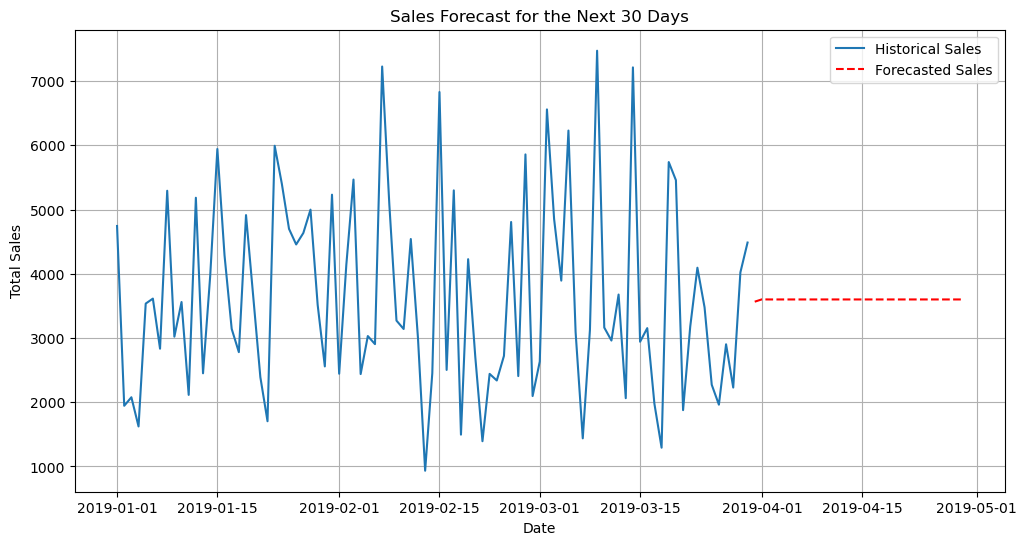

In [59]:
# Plot the historical data and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data, label='Historical Sales')
plt.plot(forecast.index, forecast, 
         label='Forecasted Sales', color='red', linestyle='--')
plt.title('Sales Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()